In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [27]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [28]:
T = np.arange(0, 50, 0.1)[:,np.newaxis]
T

array([[ 0. ],
       [ 0.1],
       [ 0.2],
       [ 0.3],
       [ 0.4],
       [ 0.5],
       [ 0.6],
       [ 0.7],
       [ 0.8],
       [ 0.9],
       [ 1. ],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       [ 2.3],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.7],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3.1],
       [ 3.2],
       [ 3.3],
       [ 3.4],
       [ 3.5],
       [ 3.6],
       [ 3.7],
       [ 3.8],
       [ 3.9],
       [ 4. ],
       [ 4.1],
       [ 4.2],
       [ 4.3],
       [ 4.4],
       [ 4.5],
       [ 4.6],
       [ 4.7],
       [ 4.8],
       [ 4.9],
       [ 5. ],
       [ 5.1],
       [ 5.2],
       [ 5.3],
       [ 5.4],
       [ 5.5],
       [ 5.6],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.3],
       [ 6.4],
       [ 6.5],
       [ 6

In [29]:
Y_=knn.predict(T)

In [30]:
Y_
#for different levels of T[loudness], what is the BPM?

array([ 98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  98.5,
        98.5,  98.5,  98.5,  98.5,  98.5,  98.5,  99. ,  99. ,  99. ,
        99. ,  99. ,  99. ,  99. ,  99. ,  99. ,  99. ,  99. ,  99. ,
        99. ,  99. ,  99. ,  99. ,  99. ,  99. ,  99. ,  99. ,  99. ,
       100.5, 100.5,

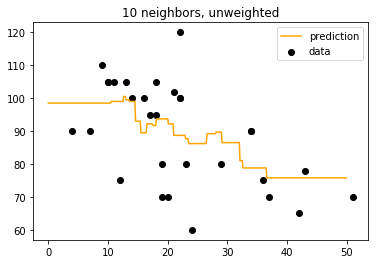

In [31]:
plt.scatter(X, Y, c='k',label='data')
plt.plot(T, Y_, c='orange', label = 'prediction')
plt.legend()
plt.title('10 neighbors, unweighted')
plt.show()

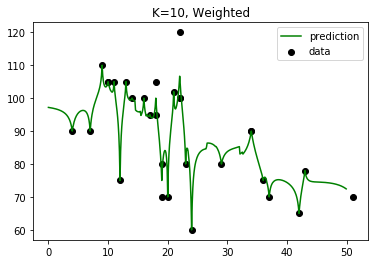

In [32]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


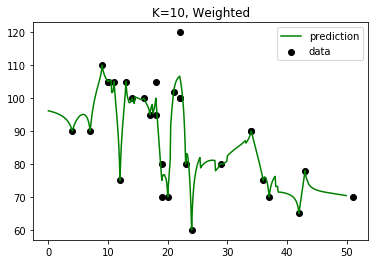

Weighted Accuracy: 0.16 (+/- 0.86)


In [72]:
#New Model
knn_w = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

In [ ]:
#cant get it a whole lot better using elements of this model that I'm familiar with